In [110]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler, Normalizer, QuantileTransformer
from tensorflow.image import resize_with_crop_or_pad

#### Import data and labels

In [111]:
data_path = './blind_cameras_dataset'
#neutrino-01 path: '/storage/gpfs_data/neutrino/SAND-LAr/SAND-LAr-OPTICALSIM-PROD/GRAIN/blindcam/data'

# Load Data 
with open(data_path+'/simulation_0.npy', 'rb') as a:    #'+str(sim_num)+'
    data_in_0 = np.load(a)  
with open(data_path+'/simulation_1.npy', 'rb') as b:    #'+str(sim_num)+'
    data_in_1 = np.load(b)
with open(data_path+'/simulation_25.npy', 'rb') as c:    #'+str(sim_num)+'
    data_in_25 = np.load(c)
    
# Load MC Truth
with open(data_path+'/inner_ph_0.npy', 'rb') as e:      #'+str(sim_num)+'
    inner_ph_in_0 = np.load(e)
with open(data_path+'/inner_ph_1.npy', 'rb') as f:      #'+str(sim_num)+'
    inner_ph_in_1 = np.load(f)
with open(data_path+'/inner_ph_25.npy', 'rb') as g:      #'+str(sim_num)+'
    inner_ph_in_25 = np.load(g)

In [112]:
d0 = data_in_0.reshape(-1, 31, 31 )
new_data_0 = np.array(resize_with_crop_or_pad(d0.T.reshape(31,31,-1), 32, 32)).T
new_data_0.shape

(54000, 32, 32)

In [113]:
# EXPLAINATION OF HOW TO PROPERLY PAD 31X31 ARRAY 

# ip = np.array([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7])
# d0 = np.array([1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,
#               1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,
#               1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,
#               1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,
#               1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,
#               1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7])

# d = d0.reshape(-1,8,7)
# dr = np.array(resize_with_crop_or_pad(d.T.reshape(7,8,-1), 8, 9))
# print(d.shape)
# print(dr.T.shape)

(6, 8, 7)
(6, 9, 8)


### Blinded cameras photon distribution

In [114]:
###### parameters #################
root_threshold = 0
###### fixed parameters ###########
n_cam_in_grain_0 = 54
n_cam_in_grain_1 = 58
cam_side_length = 32
###################################

inner_ph_in_0 = inner_ph_in_0.reshape(n_cam_in_grain_0, -1)
inner_ph_in_1 = inner_ph_in_1.reshape(n_cam_in_grain_1, -1)

new_data_0 = new_data_0.reshape(-1, cam_side_length**2)
data_in_1 = data_in_1.reshape(-1, cam_side_length**2)

data = np.concatenate((new_data_0, data_in_1))
inner_ph_in = np.concatenate((np.ravel(inner_ph_in_0, order='F'), np.ravel(inner_ph_in_1, order='F')))
# data_in = data_in_1 #new_data_0
# inner_ph_in = np.ravel(inner_ph_in_1, order='F')

label = np.zeros(inner_ph_in.shape[0])

for i in np.where( inner_ph_in > root_threshold )[0]:
    label[i] = 1

print('labelled-blind cameras :',label[label==1].shape[0])

data[data > 1000] = 1000

inner_ph_data = np.sum(data[np.where(label==1)], axis=1)

labelled-blind cameras : 1101


C:\Users\Pc\AppData\Local\Temp\ipykernel_33196\3284784955.py:30: RuntimeWarning: invalid value encountered in divide
  ratio_not_bl_lab = lab_not_bl_mean/lab_not_bl_max
C:\Users\Pc\AppData\Local\Temp\ipykernel_33196\3284784955.py:31: RuntimeWarning: invalid value encountered in divide
  ratio_dt0 = dt0_mean/dt0_max
C:\Users\Pc\AppData\Local\Temp\ipykernel_33196\3284784955.py:46: RuntimeWarning: invalid value encountered in divide
  ratio_not_bl_lab1 = lab_not_bl_mean1/lab_not_bl_max1


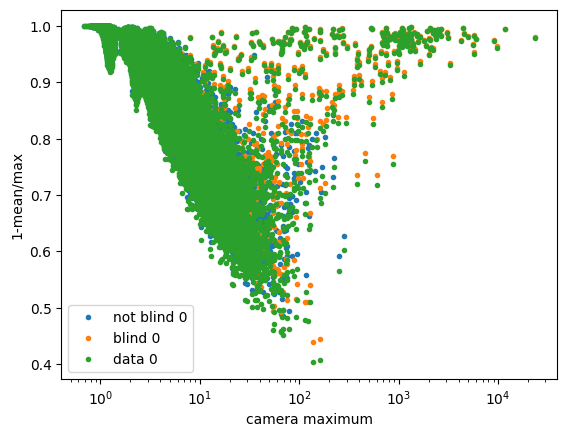

In [115]:
inph0 = np.ravel(inner_ph_in_0, order='F')
inph1 = np.ravel(inner_ph_in_1, order='F')

lbl0 = np.zeros(inph0.shape[0])
for i in np.where( inph0 > root_threshold )[0]:
    lbl0[i] = 1
    
lbl1 = np.zeros(inph1.shape[0])
for i in np.where( inph1 > root_threshold )[0]:
    lbl1[i] = 1
    
lab_bl = new_data_0[np.where(lbl0==1)]
lab_not_bl = new_data_0[np.where(lbl0==0)]

lab_not_bl_amp = np.sum(lab_not_bl, axis=1)
lab_bl_amp = np.sum(lab_bl, axis=1)
dt0_amp = np.sum(data_in_0.reshape(-1, 31*31), axis=1)
dt0r_amp = np.sum(new_data_0, axis=1)

lab_not_bl_max = np.max(lab_not_bl, axis=1)
lab_bl_max = np.max(lab_bl, axis=1)
dt0_max = np.max(data_in_0.reshape(-1, 31*31), axis=1)

lab_not_bl_mean = np.mean(lab_not_bl, axis=1)
lab_bl_mean = np.mean(lab_bl, axis=1)
dt0_mean = np.mean(data_in_0.reshape(-1, 31*31), axis=1)
dt0r_mean = np.mean(new_data_0, axis=1)

ratio_bl_lab = lab_bl_mean/lab_bl_max
ratio_not_bl_lab = lab_not_bl_mean/lab_not_bl_max
ratio_dt0 = dt0_mean/dt0_max

lab_bl1 = data_in_1[np.where(lbl1==1)]
lab_not_bl1 = data_in_1[np.where(lbl1==0)]

lab_not_bl_amp1 = np.sum(lab_not_bl1, axis=1)
lab_bl_amp1 = np.sum(lab_bl1, axis=1)

lab_not_bl_max1 = np.max(lab_not_bl1, axis=1)
lab_bl_max1 = np.max(lab_bl1, axis=1)

lab_not_bl_mean1 = np.mean(lab_not_bl1, axis=1)
lab_bl_mean1 = np.mean(lab_bl1, axis=1)

ratio_bl_lab1 = lab_bl_mean1/lab_bl_max1
ratio_not_bl_lab1 = lab_not_bl_mean1/lab_not_bl_max1

plt.plot(lab_not_bl_max, 1-ratio_not_bl_lab, '.', label='not blind 0')
plt.plot(lab_bl_max, 1-ratio_bl_lab, '.', label='blind 0')
# plt.plot(lab_not_bl_max1, 1-ratio_not_bl_lab1, '.', label='not blind 1')
# plt.plot(lab_bl_max1, 1-ratio_bl_lab1, '.', label='blind 1')
plt.plot(dt0_max, 1-ratio_dt0, '.', label='data 0')
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('1-mean/max')
plt.legend()

integral amplitude data 0: 50229358.074263096
integral amplitude data 0 reshaped: 50229358.074263096


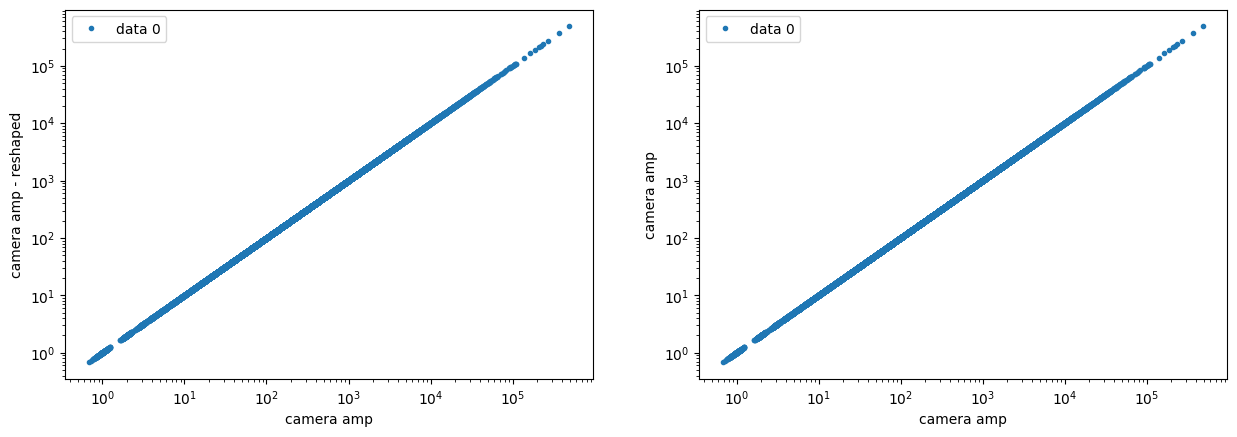

In [116]:
print('integral amplitude data 0:', np.sum(dt0_amp))
print('integral amplitude data 0 reshaped:', np.sum(dt0r_amp))

fig, ax = plt.subplots(1,2)

ax[0].plot(dt0_amp, dt0r_amp, '.', label='data 0')
#plt.plot(dt0r_amp, dt0r_mean, '.', label='data 0 reshaped')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('camera amp')
ax[0].set_ylabel('camera amp - reshaped')
ax[0].legend()

ax[1].plot(dt0_amp, dt0_amp, '.', label='data 0')
#plt.plot(dt0r_amp, dt0r_mean, '.', label='data 0 reshaped')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('camera amp')
ax[1].set_ylabel('camera amp')
ax[1].legend()

fig.set_figwidth(15)

In [117]:
# ###### parameters #################
# root_threshold = 0
# ###### fixed parameters ###########
# n_cam_in_grain = 58
# cam_side_length = 32
# renormalisation = 10000
# ###################################

# data = (data_in).reshape(-1, n_cam_in_grain, cam_side_length**2)
# print('data shape (n_data, n_cam, cam_shape) :',data.shape)

# print('\n' + '################ process data from root file ################') 
  
# inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
# print('inner photons shape :',inner_ph.shape)
  
# overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
# label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

# for evn in overthr_inner_evn:
#     for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
#         label[evn][cam] = 1
# print('labelled blind :', np.where(label==1)[0].size)

# inner_ph_data = np.sum(data[np.where(label==1)], axis=1)



# Some plots

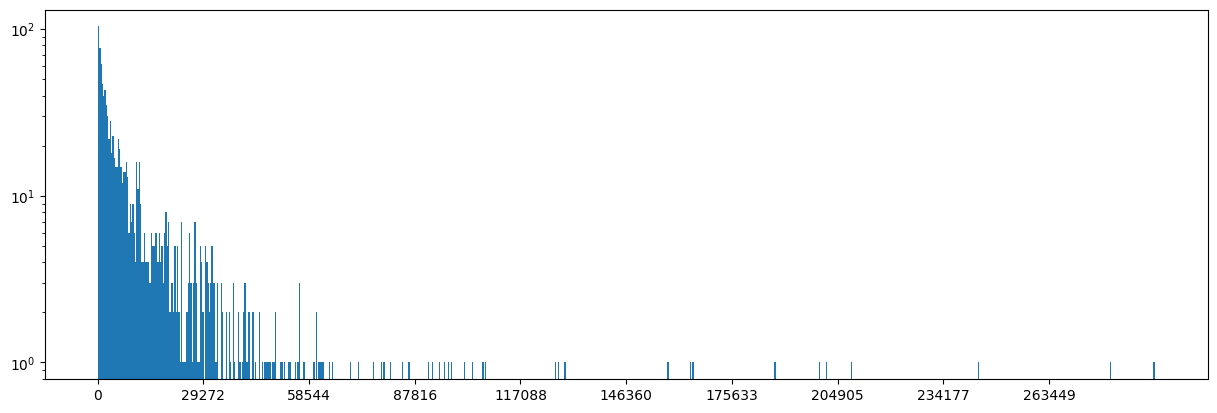

In [118]:
plt.figure().set_figwidth(15)
plt.hist(inner_ph_data,800)
plt.yscale('log')
step = np.max(inner_ph_data)/10
plt.xticks(np.arange(0, np.max(inner_ph_data), step=step));  # Set label locations.

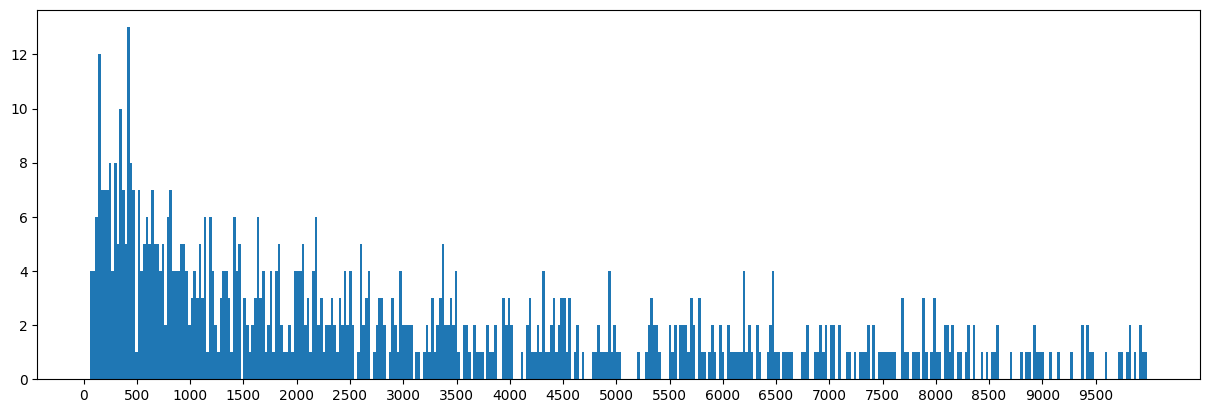

In [119]:
range = 10000

plt.figure().set_figwidth(15)
plt.hist(inner_ph_data[inner_ph_data<range],400)
#plt.yscale('log')
step = range/20
plt.xticks(np.arange(0, range, step=step));  # Set label locations.


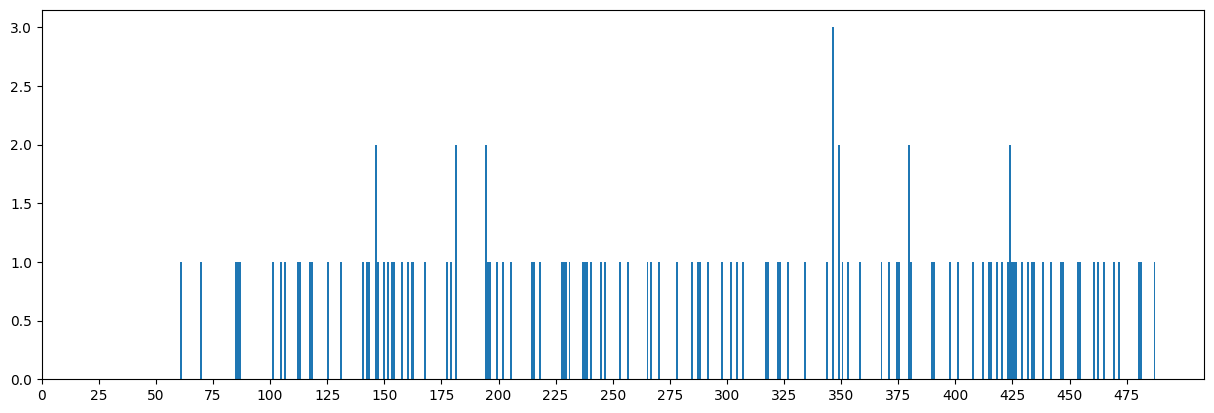

In [120]:
range = 500

plt.figure().set_figwidth(15)
plt.hist(inner_ph_data[inner_ph_data<range],500)
#plt.yscale('log')
step = range/20
plt.xticks(np.arange(0, range, step=step));  # Set label locations.

### Blinded cameras distribution after cuts

In [121]:
###### parameters #################
root_threshold = 20
###### fixed parameters ###########
n_cam_in_grain_0 = 54
n_cam_in_grain_1 = 58
cam_side_length = 32
###################################

inner_ph_in_0 = inner_ph_in_0.reshape(n_cam_in_grain_0, -1)
inner_ph_in_1 = inner_ph_in_1.reshape(n_cam_in_grain_1, -1)

new_data_0 = new_data_0.reshape(-1, cam_side_length**2)
data_in_1 = data_in_1.reshape(-1, cam_side_length**2)

data = np.concatenate((new_data_0, data_in_1))
inner_ph_in = np.concatenate((np.ravel(inner_ph_in_0, order='F'), np.ravel(inner_ph_in_1, order='F')))
# data_in = data_in_1 #new_data_0
# inner_ph_in = np.ravel(inner_ph_in_1, order='F')

label = np.zeros(inner_ph_in.shape[0])

for i in np.where( inner_ph_in > root_threshold )[0]:
    label[i] = 1

print('labelled-blind cameras :',label[label==1].shape[0])

data[data > 1000] = 1000

inner_ph_data = np.sum(data[np.where(label==1)], axis=1)
inner_ph_max = np.max(data[np.where(label==1)], axis=1)
inner_ph_mean = np.mean(data[np.where(label==1)], axis=1)
inner_ph_med = np.median(data[np.where(label==1)], axis=1)
inner_ph_mod = stats.mode(data[np.where(label==1)], axis=1)[0].ravel()

ratio = inner_ph_max/inner_ph_data
ratio_mean = inner_ph_mean/inner_ph_max
ratio_med = inner_ph_med/inner_ph_max
ratio_mod = inner_ph_mod/inner_ph_max

all_data = np.sum(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_max = np.max(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_mean = np.mean(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_med = np.median(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_mod = stats.mode(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

all_ratio = all_data_max/all_data
all_ratio_mean = all_data_mean/all_data_max
all_ratio_med = all_data_med/all_data_max
all_ratio_mod = all_data_mod/all_data_max

labelled-blind cameras : 983


C:\Users\Pc\AppData\Local\Temp\ipykernel_33196\1780843297.py:33: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  inner_ph_mod = stats.mode(data[np.where(label==1)], axis=1)[0].ravel()
C:\Users\Pc\AppData\Local\Temp\ipykernel_33196\1780843297.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [122]:
# ###### parameters #################
# root_threshold = 20
# ###### fixed parameters ###########
# n_cam_in_grain = 58
# cam_side_length = 32
# renormalisation = 10000
# ###################################

# data = (data_in).reshape(-1, n_cam_in_grain, cam_side_length**2)
# print('data shape (n_data, n_cam, cam_shape) :',data.shape)

# print('\n' + '################ process data from root file ################') 
  
# inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
# print('inner photons shape :',inner_ph.shape)
  
# overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
# label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

# for evn in overthr_inner_evn:
#     for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
#         label[evn][cam] = 1
# print('labelled blind :', np.where(label==1)[0].size)

# inner_ph_data = np.sum(data[np.where(label==1)], axis=1)
# inner_ph_max = np.max(data[np.where(label==1)], axis=1)
# inner_ph_mean = np.mean(data[np.where(label==1)], axis=1)
# inner_ph_med = np.median(data[np.where(label==1)], axis=1)
# inner_ph_mod = stats.mode(data[np.where(label==1)], axis=1)[0].ravel()

# ratio = inner_ph_max/inner_ph_data
# ratio_mean = inner_ph_mean/inner_ph_max
# ratio_med = inner_ph_med/inner_ph_max
# ratio_mod = inner_ph_mod/inner_ph_max

# all_data = np.sum(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
# all_data_max = np.max(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
# all_data_mean = np.mean(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
# all_data_med = np.median(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
# all_data_mod = stats.mode(data[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

# all_ratio = all_data_max/all_data
# all_ratio_mean = all_data_mean/all_data_max
# all_ratio_med = all_data_med/all_data_max
# all_ratio_mod = all_data_mod/all_data_max

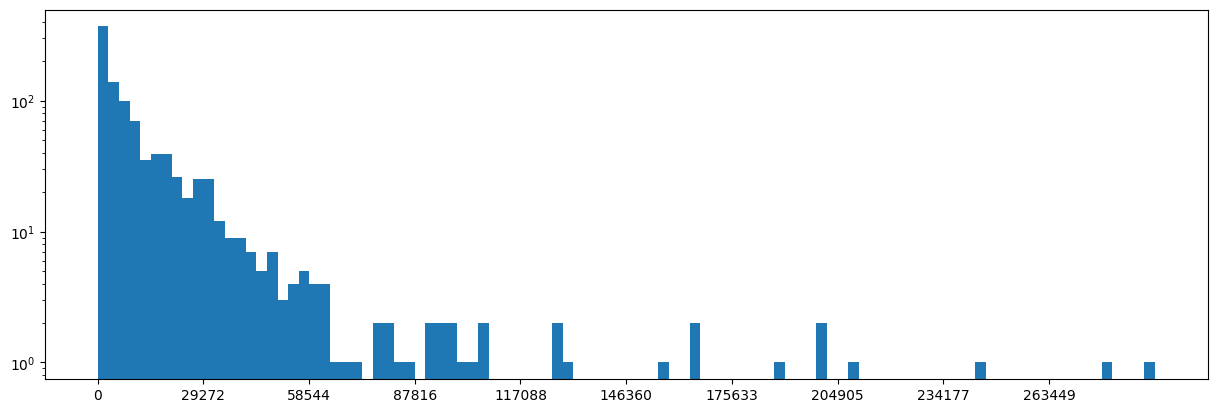

In [123]:
plt.figure().set_figwidth(15)
plt.hist(inner_ph_data,100)
plt.yscale('log')
step = np.max(inner_ph_data)/10
plt.xticks(np.arange(0, np.max(inner_ph_data), step=step));  # Set label locations.

### Pick amplitude / amplitude distribution for each camera

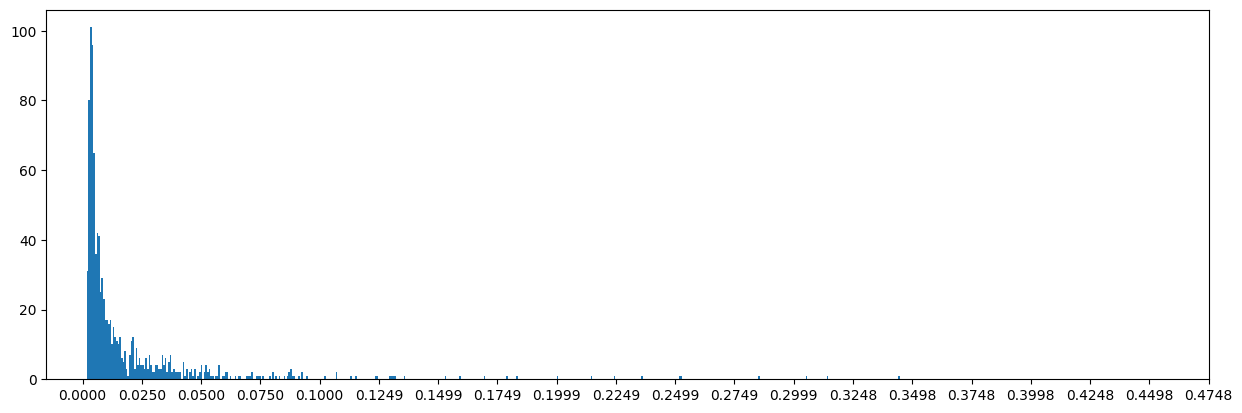

In [124]:
plt.figure().set_figwidth(15)
plt.hist(ratio[ratio < np.max(ratio)],500)
# plt.yscale('log')

#plt.yscale('log')
step = np.max(ratio)/20
plt.xticks(np.arange(0, np.max(ratio), step=step));  # Set label locations.

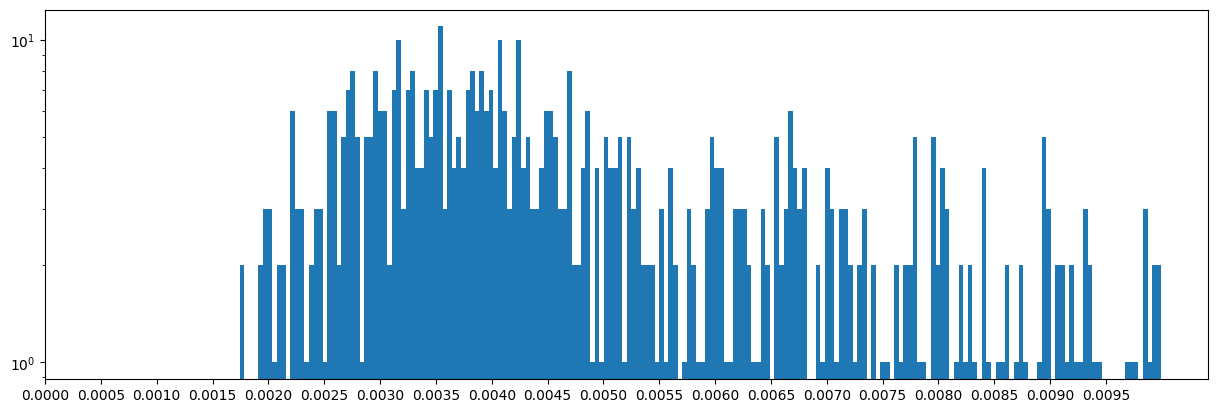

In [125]:
range = 0.01

plt.figure().set_figwidth(15)
plt.hist(ratio[ratio < range],200)
plt.yscale('log')

#plt.yscale('log')
step = range/20
plt.xticks(np.arange(0, range, step=step));  # Set label locations.

### Scatter Plots

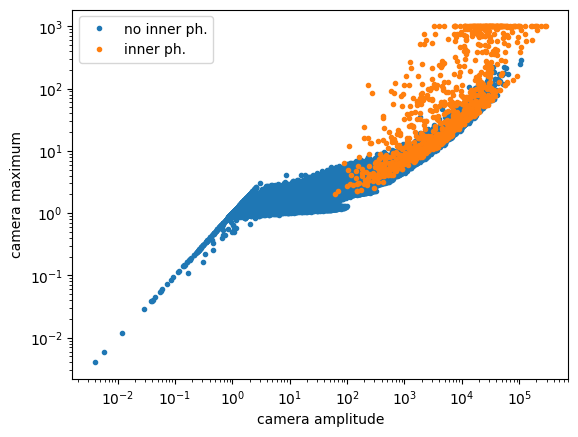

In [126]:
plt.plot(all_data, all_data_max, '.', label='no inner ph.')
plt.plot(inner_ph_data, inner_ph_max, '.', label='inner ph.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera amplitude')
plt.ylabel('camera maximum')
plt.legend()

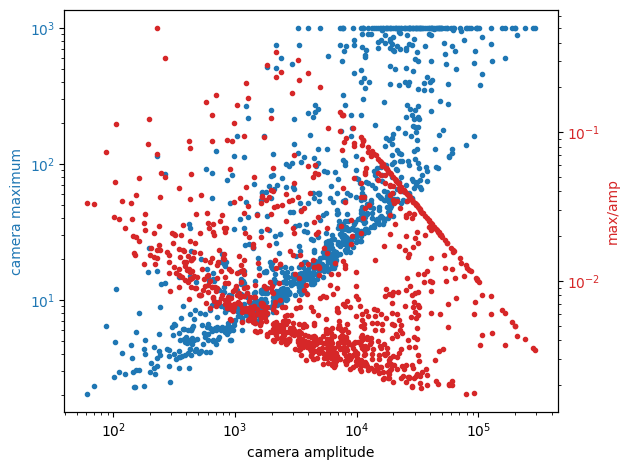

In [127]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('camera amplitude')
ax1.set_ylabel('camera maximum', color=color)
ax1.plot(inner_ph_data, inner_ph_max, '.', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

plt.xscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('max/amp', color=color)  # we already handled the x-label with ax1
ax2.plot(inner_ph_data, ratio, '.', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

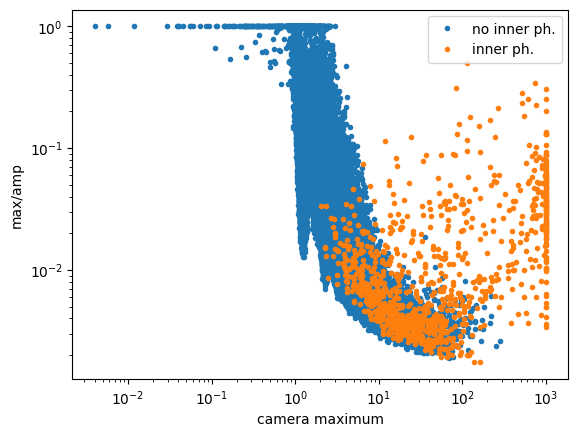

In [128]:
plt.plot(all_data_max, all_ratio, '.', label='no inner ph.')
plt.plot(inner_ph_max, ratio, '.', label='inner ph.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('max/amp')
plt.legend()

### Usage of mean

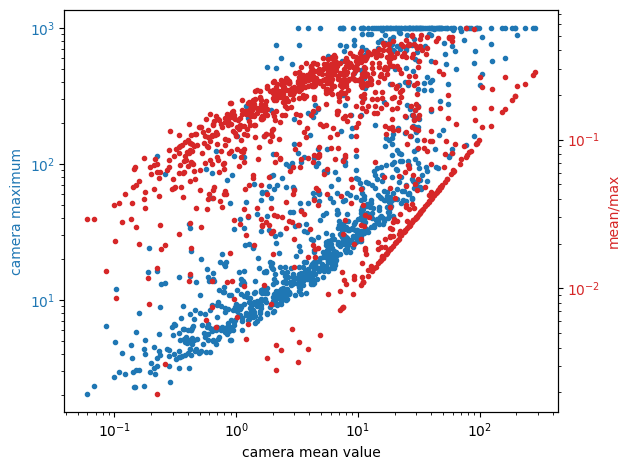

In [129]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('camera mean value')
ax1.set_ylabel('camera maximum', color=color)
ax1.plot(inner_ph_mean, inner_ph_max, '.', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

plt.xscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('mean/max', color=color)  # we already handled the x-label with ax1
ax2.plot(inner_ph_mean, ratio_mean, '.', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

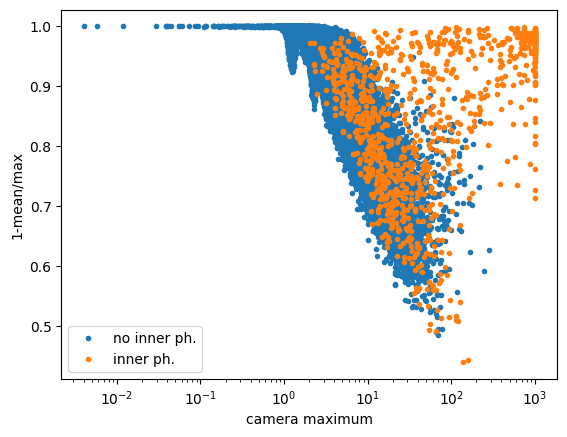

In [130]:
plt.plot(all_data_max, 1-all_ratio_mean, '.', label='no inner ph.')
plt.plot(inner_ph_max, 1-ratio_mean, '.', label='inner ph.')

# plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('1-mean/max')
plt.legend()

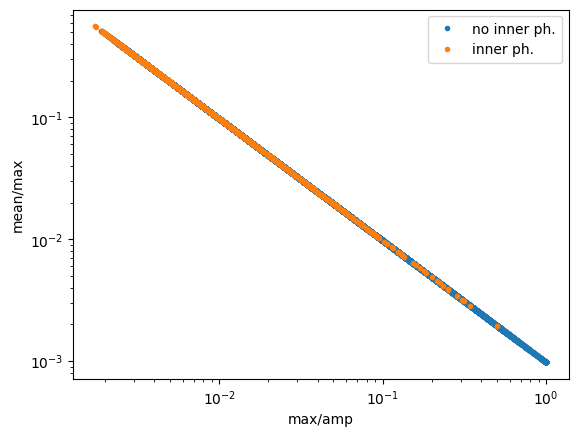

In [131]:
plt.plot(all_ratio, all_ratio_mean, '.', label='no inner ph.')
plt.plot(ratio, ratio_mean, '.', label='inner ph.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('max/amp')
plt.ylabel('mean/max')
plt.legend()

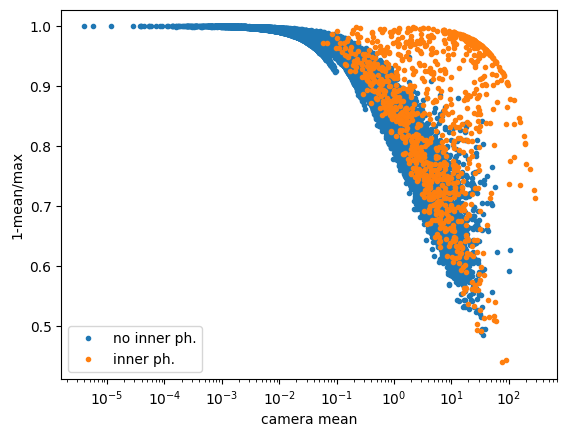

In [132]:
plt.plot(all_data_mean, 1-all_ratio_mean, '.', label='no inner ph.')
plt.plot(inner_ph_mean, 1-ratio_mean, '.', label='inner ph.')

# plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera mean')
plt.ylabel('1-mean/max')
plt.legend()

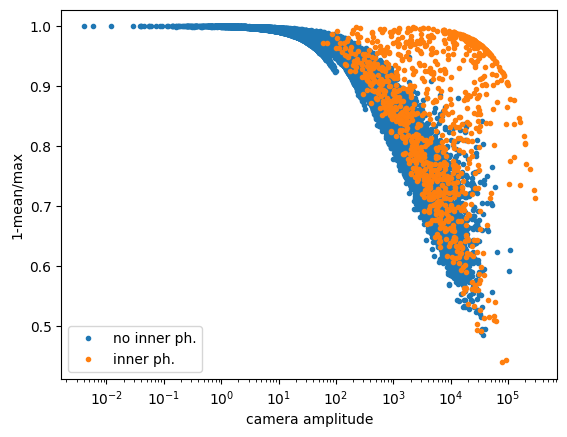

In [133]:
plt.plot(all_data, 1-all_ratio_mean, '.', label='no inner ph.')

plt.plot(inner_ph_data, 1-ratio_mean, '.', label='inner ph.')

# plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera amplitude')
plt.ylabel('1-mean/max')
plt.legend()

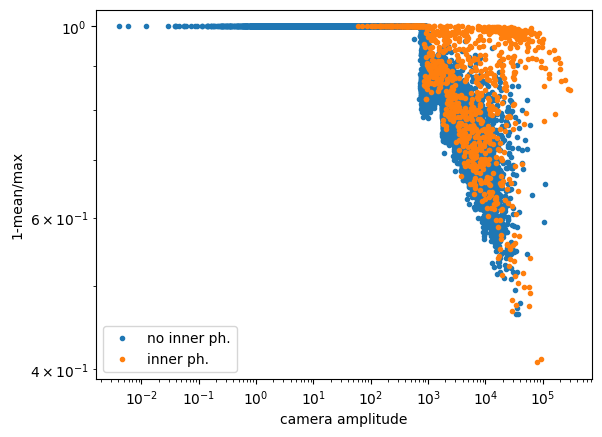

In [134]:
plt.plot(all_data, 1-all_ratio_med, '.', label='no inner ph.')
plt.plot(inner_ph_data, 1-ratio_med, '.', label='inner ph.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera amplitude')
plt.ylabel('1-mean/max')
plt.legend()

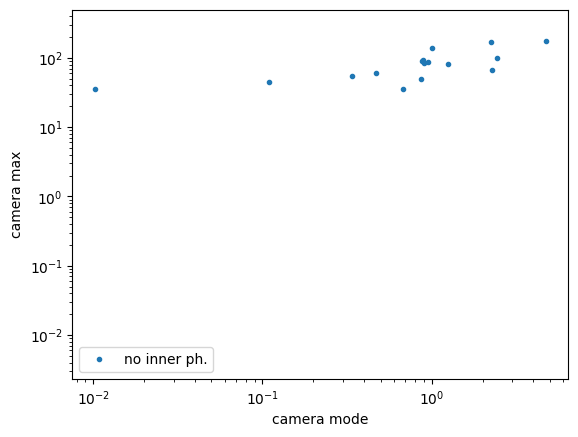

In [135]:
plt.plot(all_data_mod, all_data_max, '.', label='no inner ph.')
# plt.plot(inner_ph_mod, inner_ph_max, '.', label='inner ph.')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('camera mode')
plt.ylabel('camera max')
plt.legend()

In [136]:
scaler_ = QuantileTransformer(output_distribution="uniform").fit(data_in.reshape(cam_side_length**2,-1))
data_QT = scaler_.transform(data_in.reshape(cam_side_length**2,-1)).reshape(-1, n_cam_in_grain, cam_side_length**2)

print('data shape (n_data, n_cam, cam_shape) :',data_QT.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_QT_data = np.sum(data_QT[np.where(label==1)], axis=1)
inner_QT_max = np.max(data_QT[np.where(label==1)], axis=1)
inner_QT_mean = np.mean(data_QT[np.where(label==1)], axis=1)
inner_QT_med = np.median(data_QT[np.where(label==1)], axis=1)
inner_QT_mod = stats.mode(data_QT[np.where(label==1)], axis=1)[0].ravel()

ratio_QT = inner_QT_max/inner_QT_data
ratio_QT_mean = inner_QT_mean/inner_QT_max
ratio_QT_med = inner_QT_med/inner_QT_max
ratio_QT_mod = inner_QT_mod/inner_QT_max

all_data_QT = np.sum(data_QT[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_QT_max = np.max(data_QT[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_QT_mean = np.mean(data_QT[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_QT_med = np.median(data_QT[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_QT_mod = stats.mode(data_QT[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

all_ratio_QT = all_data_QT_max/all_data_QT
all_ratio_QT_mean = all_data_QT_mean/all_data_QT_max
all_ratio_QT_med = all_data_QT_med/all_data_QT_max
all_ratio_QT_mod = all_data_QT_mod/all_data_QT_max

fig, ax = plt.subplots(2,2)

ax[0,0].plot(all_data_QT_max, 1-all_ratio_QT_mean, '.', label='no inner ph.')
ax[0,0].plot(inner_QT_max, 1-ratio_QT_mean, '.', label='inner ph.')
ax[0,0].set_xscale('log')
ax[0,0].set_xlabel('camera maximum')
ax[0,0].set_ylabel('1-mean/max')
ax[0,0].legend()

ax[0,1].plot(all_data_max, 1-all_ratio_mean, '.', label='no inner ph.')
ax[0,1].plot(inner_ph_max, 1-ratio_mean, '.', label='inner ph.')
ax[0,1].set_xscale('log')
ax[0,1].set_xlabel('camera maximum')
ax[0,1].set_ylabel('1-mean/max')
ax[0,1].legend()


ax[1,0].hist(all_data_QT_max.reshape(-1,1), 100, alpha=0.5, label='no inner ph')
ax[1,0].hist(inner_QT_max.reshape(-1,1), 50, alpha=0.5, label='inner ph')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].legend()
fig.set_figwidth(15)
fig.set_figheight(10)

NameError: name 'data_in' is not defined

In [ ]:
scaler_ = Normalizer().fit(data_in.reshape(cam_side_length**2,-1))
data_N = scaler_.transform(data_in.reshape(cam_side_length**2,-1)).reshape(-1, n_cam_in_grain, cam_side_length**2)

print('data shape (n_data, n_cam, cam_shape) :',data_N.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_N_data = np.sum(data_N[np.where(label==1)], axis=1)
inner_N_max = np.max(data_N[np.where(label==1)], axis=1)
inner_N_mean = np.mean(data_N[np.where(label==1)], axis=1)
inner_N_med = np.median(data_N[np.where(label==1)], axis=1)
inner_N_mod = stats.mode(data_N[np.where(label==1)], axis=1)[0].ravel()

ratio_N = inner_N_max/inner_N_data
ratio_N_mean = inner_N_mean/inner_N_max
ratio_N_med = inner_N_med/inner_N_max
ratio_N_mod = inner_N_mod/inner_N_max

all_data_N = np.sum(data_N[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_N_max = np.max(data_N[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_N_mean = np.mean(data_N[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_N_med = np.median(data_N[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_N_mod = stats.mode(data_N[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

all_ratio_N = all_data_N_max/all_data_N
all_ratio_N_mean = all_data_N_mean/all_data_N_max
all_ratio_N_med = all_data_N_med/all_data_N_max
all_ratio_N_mod = all_data_N_mod/all_data_N_max

fig, ax = plt.subplots(2,2)

ax[0,0].plot(all_data_N_max, 1-all_ratio_N_mean, '.', label='no inner ph.')
ax[0,0].plot(inner_N_max, 1-ratio_N_mean, '.', label='inner ph.')
ax[0,0].set_xscale('log')
ax[0,0].set_xlabel('camera maximum')
ax[0,0].set_ylabel('1-mean/max')
ax[0,0].legend()

ax[0,1].plot(all_data_max, 1-all_ratio_mean, '.', label='no inner ph.')
ax[0,1].plot(inner_ph_max, 1-ratio_mean, '.', label='inner ph.')
ax[0,1].set_xscale('log')
ax[0,1].set_xlabel('camera maximum')
ax[0,1].set_ylabel('1-mean/max')
ax[0,1].legend()


ax[1,0].hist(all_data_N_max.reshape(-1,1), 100, alpha=0.5, label='no inner ph')
ax[1,0].hist(inner_N_max.reshape(-1,1), 50, alpha=0.5, label='inner ph')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].legend()
fig.set_figwidth(15)
fig.set_figheight(10)

In [ ]:
scaler_ = MaxAbsScaler().fit(data_in.reshape(cam_side_length**2,-1))
data_MAS = scaler_.transform(data_in.reshape(cam_side_length**2,-1)).reshape(-1, n_cam_in_grain, cam_side_length**2)

print('data shape (n_data, n_cam, cam_shape) :',data_N.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_MAS_data = np.sum(data_MAS[np.where(label==1)], axis=1)
inner_MAS_max = np.max(data_MAS[np.where(label==1)], axis=1)
inner_MAS_mean = np.mean(data_MAS[np.where(label==1)], axis=1)
inner_MAS_med = np.median(data_MAS[np.where(label==1)], axis=1)
inner_MAS_mod = stats.mode(data_MAS[np.where(label==1)], axis=1)[0].ravel()

ratio_MAS = inner_MAS_max/inner_MAS_data
ratio_MAS_mean = inner_MAS_mean/inner_MAS_max
ratio_MAS_med = inner_MAS_med/inner_MAS_max
ratio_MAS_mod = inner_MAS_mod/inner_MAS_max

all_data_MAS = np.sum(data_MAS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_MAS_max = np.max(data_MAS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_MAS_mean = np.mean(data_MAS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_MAS_med = np.median(data_MAS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_MAS_mod = stats.mode(data_MAS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

all_ratio_MAS = all_data_MAS_max/all_data_MAS
all_ratio_MAS_mean = all_data_MAS_mean/all_data_MAS_max
all_ratio_MAS_med = all_data_MAS_med/all_data_MAS_max
all_ratio_MAS_mod = all_data_MAS_mod/all_data_MAS_max

fig, ax = plt.subplots(1,2)

ax[0].plot(all_data_MAS_max, 1-all_ratio_MAS_mean, '.', label='no inner ph.')
ax[0].plot(inner_MAS_max, 1-ratio_MAS_mean, '.', label='inner ph.')
ax[0].set_xscale('log')
ax[0].set_xlabel('camera maximum')
ax[0].set_ylabel('1-mean/max')
ax[0].legend()

ax[1].plot(all_data_max, 1-all_ratio_mean, '.', label='no inner ph.')
ax[1].plot(inner_ph_max, 1-ratio_mean, '.', label='inner ph.')
ax[1].set_xscale('log')
ax[1].set_xlabel('camera maximum')
ax[1].set_ylabel('1-mean/max')
ax[1].legend()

fig.set_figwidth(15)

In [ ]:
scaler_ = StandardScaler().fit(data_in.reshape(cam_side_length**2,-1))
data_SS = scaler_.transform(data_in.reshape(cam_side_length**2,-1)).reshape(-1, n_cam_in_grain, cam_side_length**2)

print('data shape (n_data, n_cam, cam_shape) :',data_SS.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_SS_data = np.sum(data_SS[np.where(label==1)], axis=1)
inner_SS_max = np.max(data_SS[np.where(label==1)], axis=1)
inner_SS_mean = np.mean(data_SS[np.where(label==1)], axis=1)
inner_SS_med = np.median(data_SS[np.where(label==1)], axis=1)
inner_SS_mod = stats.mode(data_SS[np.where(label==1)], axis=1)[0].ravel()

ratio_SS = inner_SS_max/inner_SS_data
ratio_SS_mean = inner_SS_mean/inner_SS_max
ratio_SS_med = inner_SS_med/inner_SS_max
ratio_SS_mod = inner_SS_mod/inner_SS_max

all_data_SS = np.sum(data_SS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_SS_max = np.max(data_SS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_SS_mean = np.mean(data_SS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_SS_med = np.median(data_SS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_SS_mod = stats.mode(data_SS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

all_ratio_SS = all_data_SS_max/all_data_SS
all_ratio_SS_mean = all_data_SS_mean/all_data_SS_max
all_ratio_SS_med = all_data_SS_med/all_data_SS_max
all_ratio_SS_mod = all_data_SS_mod/all_data_SS_max

fig, ax = plt.subplots(1,2)

ax[0].plot(all_data_SS_max, 1-all_ratio_SS_mean, '.', label='no inner ph.')
ax[0].plot(inner_SS_max, 1-ratio_SS_mean, '.', label='inner ph.')
ax[0].set_xscale('log')
ax[0].set_xlabel('camera maximum')
ax[0].set_ylabel('1-mean/max')
ax[0].legend()

ax[1].plot(all_data_max, 1-all_ratio_mean, '.', label='no inner ph.')
ax[1].plot(inner_ph_max, 1-ratio_mean, '.', label='inner ph.')
ax[1].set_xscale('log')
ax[1].set_xlabel('camera maximum')
ax[1].set_ylabel('1-mean/max')
ax[1].legend()

fig.set_figwidth(15)

In [ ]:
scaler_ = RobustScaler().fit(data_in.reshape(cam_side_length**2,-1))
data_RS = scaler_.transform(data_in.reshape(cam_side_length**2,-1)).reshape(-1, n_cam_in_grain, cam_side_length**2)

print('data shape (n_data, n_cam, cam_shape) :',data_RS.shape)

print('\n' + '################ process data from root file ################') 
  
inner_ph = inner_ph_in.reshape(n_cam_in_grain, -1)    #inner_ph_in.reshape(76,-1)  
print('inner photons shape :',inner_ph.shape)
  
overthr_inner_evn = np.unique( np.where( inner_ph > root_threshold )[1] )
label = np.zeros(inner_ph_in.size).reshape(-1, n_cam_in_grain)

for evn in overthr_inner_evn:
    for cam in np.unique( np.where( inner_ph.T[evn] > root_threshold ) ):
        label[evn][cam] = 1
print('labelled blind :', np.where(label==1)[0].size)

inner_RS_data = np.sum(data_RS[np.where(label==1)], axis=1)
inner_RS_max = np.max(data_RS[np.where(label==1)], axis=1)
inner_RS_mean = np.mean(data_RS[np.where(label==1)], axis=1)
inner_RS_med = np.median(data_RS[np.where(label==1)], axis=1)
inner_RS_mod = stats.mode(data_RS[np.where(label==1)], axis=1)[0].ravel()

ratio_RS = inner_RS_max/inner_RS_data
ratio_RS_mean = inner_RS_mean/inner_RS_max
ratio_RS_med = inner_RS_med/inner_RS_max
ratio_RS_mod = inner_RS_mod/inner_RS_max

all_data_RS = np.sum(data_RS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_RS_max = np.max(data_RS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_RS_mean = np.mean(data_RS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_RS_med = np.median(data_RS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)
all_data_RS_mod = stats.mode(data_RS[np.where(label==0)].reshape(-1, cam_side_length**2), axis=1)[0].ravel()

all_ratio_RS = all_data_RS_max/all_data_RS
all_ratio_RS_mean = all_data_RS_mean/all_data_RS_max
all_ratio_RS_med = all_data_RS_med/all_data_RS_max
all_ratio_RS_mod = all_data_RS_mod/all_data_RS_max

fig, ax = plt.subplots(1,2)

ax[0].plot(all_data_RS_max, 1-all_ratio_RS_mean, '.', label='no inner ph.')
ax[0].plot(inner_RS_max, 1-ratio_RS_mean, '.', label='inner ph.')
ax[0].set_xscale('log')
ax[0].set_xlabel('camera maximum')
ax[0].set_ylabel('1-mean/max')
ax[0].legend()

ax[1].plot(all_data_max, 1-all_ratio_mean, '.', label='no inner ph.')
ax[1].plot(inner_ph_max, 1-ratio_mean, '.', label='inner ph.')
ax[1].set_xscale('log')
ax[1].set_xlabel('camera maximum')
ax[1].set_ylabel('1-mean/max')
ax[1].legend()

fig.set_figwidth(15)